# MechaRela Numerical Simulation - Solution 4

## Conservation of Energy
If the force acting on a particle is conservative, a potential energy can be defined. The sum of kinetic and potential energy is then constant: (mechanical) energy is conserved.
However, if the force is not a conservative one, mechanical energy is not conserved. The force will perform work on the particle. The total energy, if we include the work done, is still conserved. In many real life cases, the work done by non-conservative forces shows up as heat.

### Energy conservation of a mass-spring
First, we will consider a mass $m$, suspended on a spring (rest length $l_0$ en spring constant $k$). The spring is at a fixed position at one end, while the mass $m$ is attached at the other end. $m$ is displaced by an amount $\Delta x$ and then released without initial velocity.

**Task**: Set up the analysis of this problem. It can be solved analytically.
<ul>
    <li>Make a sketch</li>
    <li>Set up a model</li>
    <li>Solve the model</li>
    <li>Show that energy is conserved: the sum of kinetic and potential energy is constant.</li>
    <li>Make a python programme that outputs a plot of the kinetic, potential and total energy as a function of time.</li>
</ul>


### Friction: work done and energy conservation
We could introduce a frictional force that will result in damping of the oscillation. A common example is having a friction that is proportional to the velocity of the mass $m$ and works against the direction of motion:

$F_f = - bv$

with $b$ a proportionality constant. Note that we are taking the problem as one-dimensional.

We could solve this problem analytically, but it is illustrative to do it numerically as we can then easily compute the work done the friction force.

So, the **task** is: 
<ul>
    <li>Make a sketch</li>
    <li>Set up a model</li>
    <li>Make a python programme that outputs a plot of the kinetic, potential and total mechanical energy (that is the sum of kinetic and potential energy) as a function of time.</li>
    <li>Compute the work done by the friction force and plot this also as function of time.</li>
</ul>

Take the following parameters:
$l_0 = 20$ cm, $\Delta x = 1$ cm, $m = 1$ kg, $k = 1$ N/m, $b =0.1$ Ns/m

It is instructive to change the time step $dt$ while keeping the total time (that is $N\cdot dt$) constant. You will notice that for 'large' time steps, it seems that energy is not conserved (of course taking into account the work done by the friction force), but that by making the time step smaller conservation of energy seems to be more and more obeyed. This is a consequence of *numerical errors*. The laws of physics are clear: energy must be conserved.

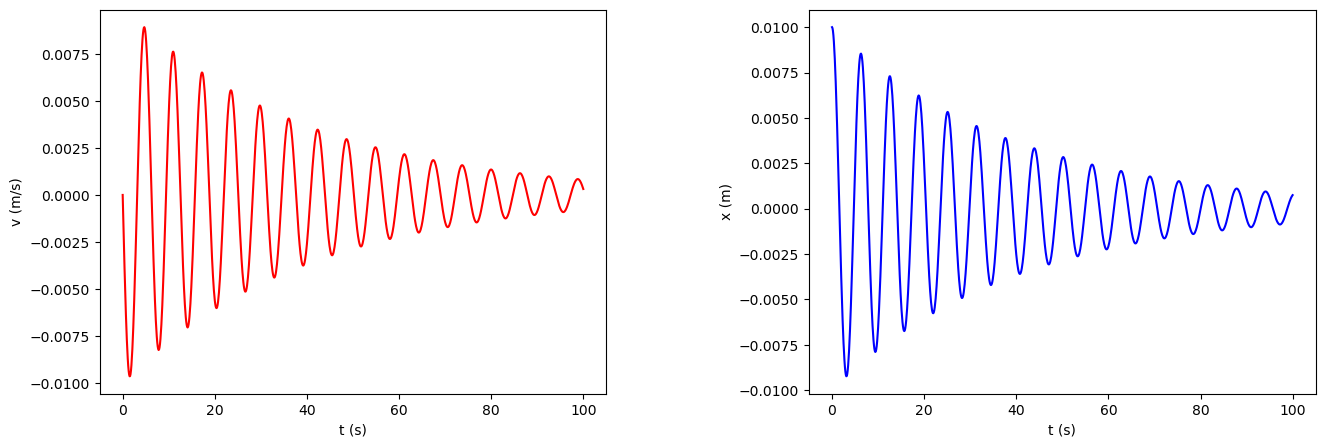

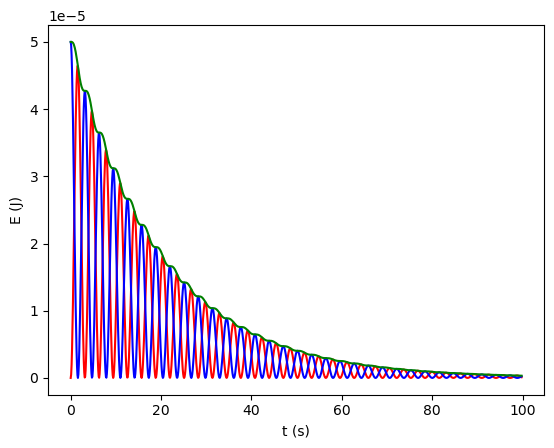

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# initiate the required variables / add additional ones if needed
# change the values if needed
N=1000           #replace this by the value you need for your problem
dt = 1e-1       #replace this by the value you need for your problem
m = 1           #replace this by the value you need for your problem
k = 1           #replace this by the value you need for your problem
b = 0.1        #replace this by the value you need for your problem
l0 = 0.2        #replace this by the value you need for your problem

i=0
t = 0*np.linspace(0,N,N+1)
v = 0*np.linspace(0,N,N+1)
x = 0*np.linspace(0,N,N+1)
Ekin = 0*np.linspace(0,N,N+1)
Epot = 0*np.linspace(0,N,N+1)
Etot = 0*np.linspace(0,N,N+1)

# provide the initial conditions
x0 = 0.01     #replace this by the actual initial condition
v0 = 0     #replace this by the actual initial condition
x[0]=x0
v[0]=v0

#define the function F/m
def force(x, v):
    force = -k*x - b*v      #replace this line with the actual F/m - expression
    return force

#compute the trajectory and velocity
while i < N:
    t[i+1] = (i+1)*dt
    v[i+1] = v[i] + force(x[i],v[i])*dt
    x[i+1] = x[i] + (v[i]+v[i+1])*dt/2.0
    i = i+1

for i in range(0,N):
    Ekin[i] = 1.0/2.0*m*v[i]*v[i]
    Epot[i] = 1.0/2.0*k*x[i]*x[i]
    Etot[i] = Ekin[i]+Epot[i]

    # plot the results
plt.subplot(121)
plt.plot(t,v,'r-')
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.subplot(122)
plt.plot(t,x,'b-')
plt.xlabel('t (s)')
plt.ylabel('x (m)')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

# show the plots
plt.show()

# plot the results
plt.plot(t[0:N-1],Ekin[0:N-1],'r-',t[0:N-1],Epot[0:N-1],'b-',t[0:N-1],Etot[0:N-1],'g-')
plt.xlabel('t (s)')
plt.ylabel('E (J)')

# show the plots
plt.show()


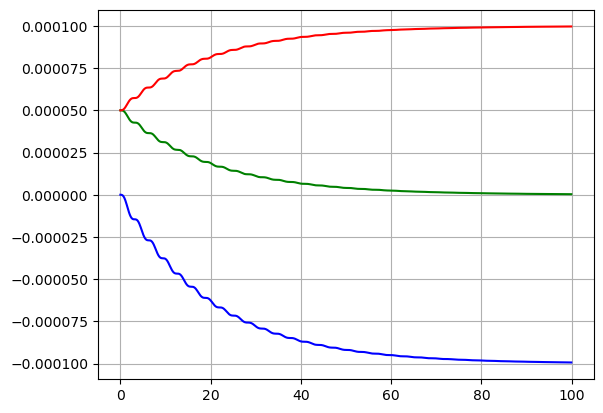

In [2]:
#work done
W = 0*np.linspace(0,N,N+1)
for i in range(0,N):
    W[i+1] = W[i] + (-b*1/2*(v[i]+v[i+1]))*(x[i+1]-x[i])
    
plt.plot(t[:N],W[:N],'b-',t[:N],Etot[:N],'g-',t[:N],Etot[:N]-W[:N],'r-')
plt.grid()
plt.show()